**Project Overview**
This project aims to clean data and prepare it for analysis and further modeling. The dataset contains anonymized student information, and whether they were looking for a new job or not during


| Column                  | Description                                                                 |
|-------------------------|-----------------------------------------------------------------------------|
| student_id              | A unique ID for each student.                                              |
| city                    | A code for the city the student lives in.                                  |
| city_development_index  | A scaled development index for the city.                                   |
| gender                  | The student's gender.                                                      |
| relevant_experience     | An indicator of the student's work relevant experience.                    |
| enrolled_university     | The type of university course enrolled in (if any).                        |
| education_level         | The student's education level.                                             |
| major_discipline        | The educational discipline of the student.                                 |
| experience              | The student's total work experience (in years).                            |
| company_size            | The number of employees at the student's current employer.                 |
| company_type            | The type of company employing the student.                                 |
| last_new_job            | The number of years between the student's current and previous jobs.       |
| training_hours          | The number of hours of training completed.                                 |
| job_change              | An indicator of whether the student is looking for a new job (1) or not (0). | 

In [4]:
# Import necessary libraries
import pandas as pd

# Load the dataset
ds_jobs = pd.read_csv("customer_train.csv")

# View the dataset
ds_jobs.head()

,student_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
0,8949,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevant experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevant experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevant experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevant experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


**cleaning Process**


 

In [9]:
# Create a copy of ds_jobs for transforming
ds_jobs_transformed = ds_jobs.copy()
print(ds_jobs.info())
# Start coding here. Use as many cells as you like!
# Import necessary libraries
import pandas as pd

# Load the dataset and create a copy
ds_jobs = pd.read_csv("customer_train.csv")
ds_jobs_transformed = ds_jobs.copy()

# EDA to help identify ordinal, nominal, and two-factor categories
for col in ds_jobs.select_dtypes("object").columns:
    print(ds_jobs_transformed[col].value_counts(), '\n')

# Create a dictionary of columns containing ordered categorical data
ordered_cats = {
    'enrolled_university': ['no_enrollment', 'Part time course', 'Full time course'],
    'education_level': ['Primary School', 'High School', 'Graduate', 'Masters', 'Phd'],
    'experience': ['<1'] + list(map(str, range(1, 21))) + ['>20'],
    'company_size': ['<10', '10-49', '50-99', '100-499', '500-999', '1000-4999', '5000-9999', '10000+'],
    'last_new_job': ['never', '1', '2', '3', '4', '>4']
}

# Create a mapping dictionary of columns containing two-factor categories to convert to Booleans
two_factor_cats = {
    'relevant_experience': {'No relevant experience': False, 'Has relevant experience': True},
    'job_change': {0.0: False, 1.0: True}
}

# Loop through DataFrame columns to efficiently change data types
for col in ds_jobs_transformed:
    
    # Convert two-factor categories to bool
    if col in ['relevant_experience', 'job_change']:
        ds_jobs_transformed[col] = ds_jobs_transformed[col].map(two_factor_cats[col])
    
    # Convert integer columns to int32
    elif col in ['student_id', 'training_hours']:
        ds_jobs_transformed[col] = ds_jobs_transformed[col].astype('int32')
    
    # Convert float columns to float16
    elif col == 'city_development_index':
        ds_jobs_transformed[col] = ds_jobs_transformed[col].astype('float16')
    
    # Convert columns containing ordered categorical data to ordered categories using dict
    elif col in ordered_cats.keys():
        category = pd.CategoricalDtype(ordered_cats[col], ordered=True)
        ds_jobs_transformed[col] = ds_jobs_transformed[col].astype(category)
    
    # Convert remaining columns to standard categories
    else:
        ds_jobs_transformed[col] = ds_jobs_transformed[col].astype('category')
        
# Filter students with 10 or more years experience at companies with at least 1000 employees
ds_jobs_transformed = ds_jobs_transformed[(ds_jobs_transformed['experience'] >= '10') & (ds_jobs_transformed['company_size'] >= '1000-4999')]
print("========================= after cleaning =========================")
print(ds_jobs_transformed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   student_id              19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevant_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  job_change              19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

**Explatory Data Analysis**

**Distribution of Training Hours**

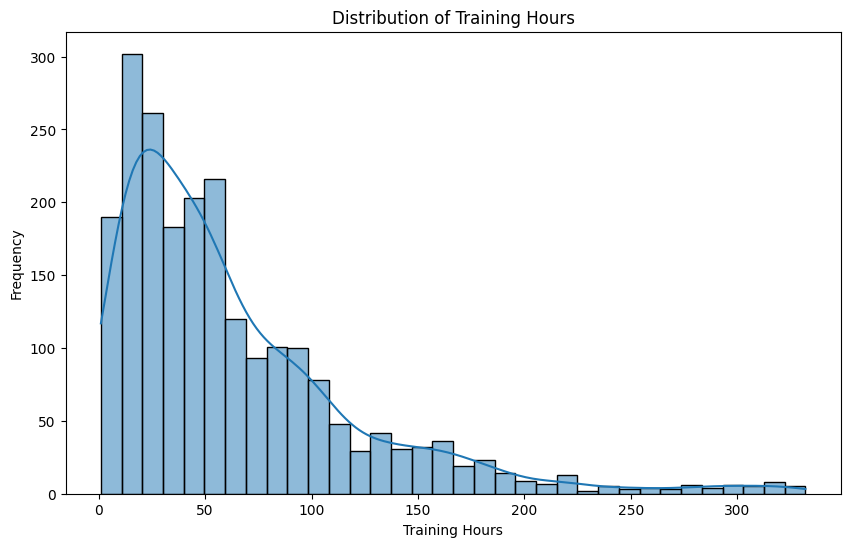

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(ds_jobs_transformed['training_hours'], kde=True)
plt.title('Distribution of Training Hours')
plt.xlabel('Training Hours')
plt.ylabel('Frequency')
plt.show()


**City Development Index by Job Change**

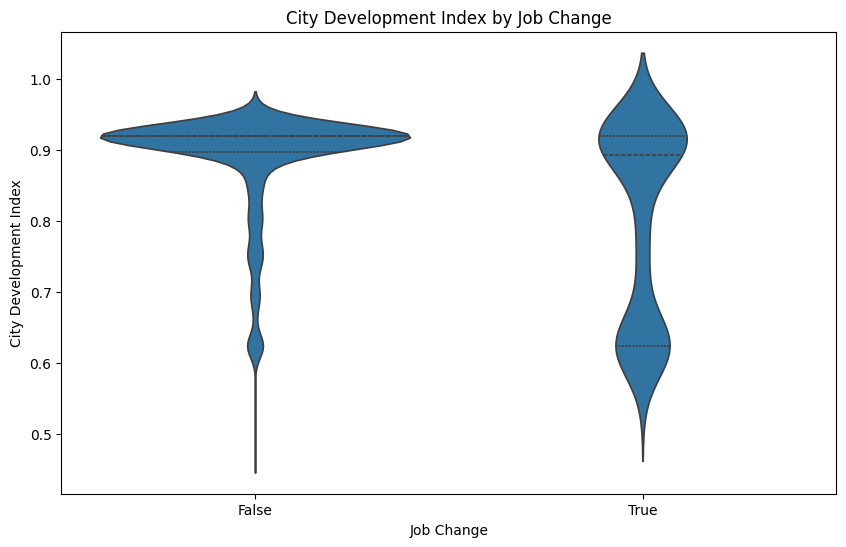

In [7]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=ds_jobs_transformed, x='job_change', y='city_development_index', inner='quartile')
plt.title('City Development Index by Job Change')
plt.xlabel('Job Change')
plt.ylabel('City Development Index')
plt.show()


**Correlation Heatmap**

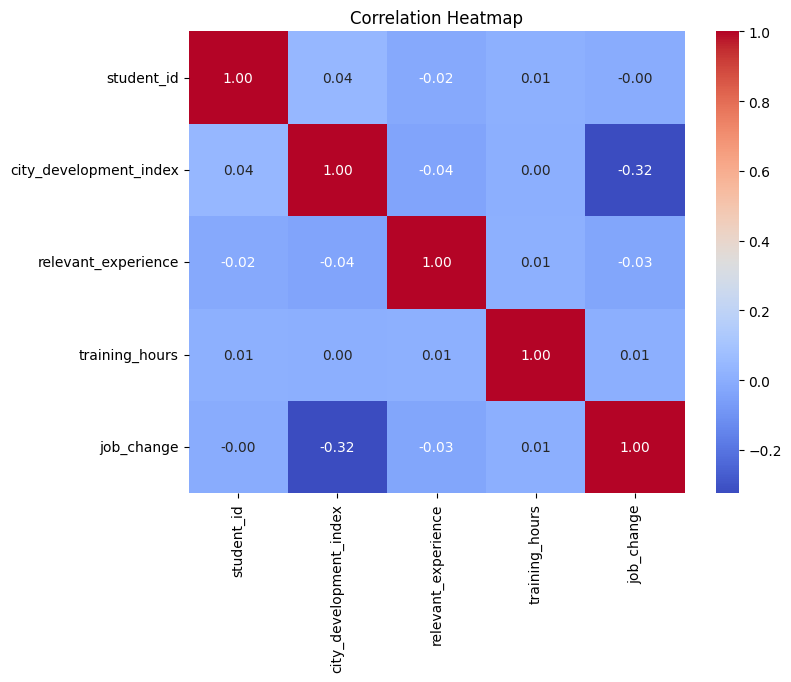

In [8]:
plt.figure(figsize=(8, 6))
numeric_cols = ds_jobs_transformed.select_dtypes(include=['float16', 'int32', 'bool']).copy()
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


**Conclusion**

 The goal was to clean the data to prepare it for any advanced analysis or ai modeling in which i did reduce the memory usage  from +2 MB to less than 70 KB. I have performed some explatory data analysis to understand the data better and identify any patterns or trends that may exist. Unfortunately, the dataset is not very large and does not contain any significant patterns or trends. However, I have provided some visualizations to help understand the data better. The correlation heatmap shows that there are some correlations between the features, but they are not very strong. Overall, the dataset is clean and ready for any advanced analysis or ai modeling.